# Laptop Price Prediction

When you purchase a new Laptop, you estimate its price based on its specifications like the processor, RAM, screen size etc.

In this case study, the task is to create a machine learning model which can predict the <b>price</b> of a Laptop based on its specs

In this project, a multiple regression models was used to predict the price of laptops based on various features such as brand, specifications (e.g., processor, RAM, storage), screen size, and other characteristics. The dataset was analyzed to identify key factors influencing laptop prices, and the model was trained and evaluated to ensure accurate predictions.

Followings are the relevant steps of the modelling workflow.

* Reading the data in python
* Defining the problem statement
* Identifying the Target variable
* Basic Data exploration
* Rejecting useless columns
* Visual Exploratory Data Analysis for data distribution (Histogram and Barcharts)
* Outlier treatment
* Missing Values treatment
* Visual correlation analysis
* Feature Selection based on data distribution
* Statistical correlation analysis (Feature Selection)
* Converting data to numeric for ML
* Fit a Linear Regression Model
* Evaluate your model - check assumptions, metrics, etc.
* Selecting the best Model

Our goal is to achieve <b>R2_score > 80</b>


## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from scipy.stats import chi2_contingency, f_oneway, boxcox
import scipy.stats as stats

import joblib

## Reading the data in python

In [2]:
laptops = pd.read_csv("G:/Study material/Data Science/Projects/1. Laptop price predictor/laptop_data_campusx.csv")

laptops.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


## Defining the Problem Statement

<b>Build a linear regression model that predicts the `price` of laptops based on its specifications</b>

* Target Variable: `price`

## Basic Data Exploration

* Check the datatypes of features
* Identify which features are quantitative, categorical and qualitative
* Remove useless features

In [3]:
laptops.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 822.2 KB


In [4]:
laptops.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

We will delete `Unnamed` column because it is not useful

In [5]:
laptops.drop("Unnamed: 0", axis=1, inplace=True)

laptops.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [6]:
laptops.describe()

,Inches,Price
count,1303.000000,1303.000000
mean,15.017191,59870.042910
std,1.426304,37243.201786
min,10.100000,9270.720000
25%,14.000000,31914.720000
50%,15.600000,52054.560000
75%,15.600000,79274.246400
max,18.400000,324954.720000


In [7]:
laptops.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price             1303 non-null   float64
dtypes: float64(2), object(9)
memory usage: 812.0 KB


We have object datatype for `Ram` and `Weight` columns so we can convert these columns into numberic  

In [8]:
laptops["Ram"].value_counts()

8GB     619
4GB     375
16GB    200
6GB      41
12GB     25
2GB      22
32GB     17
24GB      3
64GB      1
Name: Ram, dtype: int64

In [9]:
laptops["Ram"] = laptops["Ram"].str.replace("GB","")
laptops.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [10]:
laptops["Weight"] = laptops["Weight"].str.replace("kg","")
laptops.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [11]:
laptops["Ram"] = laptops["Ram"].astype("int32")
laptops["Weight"] = laptops["Weight"].astype("float32")

laptops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 101.9+ KB


Now we have 4 numerical variables inlcuding target variable and 7 categorical variables

**Numerical variables**
* `Inches`
* `Ram`
* `Weight`
* `Price` (Target variable)

**Categorical variables**
* `Company`
* `TypeName`
* `ScreenResolution`
* `Cpu`
* `Memory`
* `Gpu`
* `OpSys`

As of now we have these numberical and categorical variable. 


## Exploratory Data Analysis

We will take one variable at a time and we do analysis.

* Categorical variables: Bar plot 
* Continuous variables: Histogram

Also we will check there relation with the target variable

Our target variable is continuous therefore we will use following visuals and statistical tests to check correlation between independent variable and dependent variable

* Continuous variable -> Scatter plot and Correlation matrix
* Categorical variable -> Box Plot and ANOVA test

We will do **Feature Engineering** when needed

In [12]:
laptops.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [13]:
laptops['Price'].describe()

count      1303.000000
mean      59870.042910
std       37243.201786
min        9270.720000
25%       31914.720000
50%       52054.560000
75%       79274.246400
max      324954.720000
Name: Price, dtype: float64

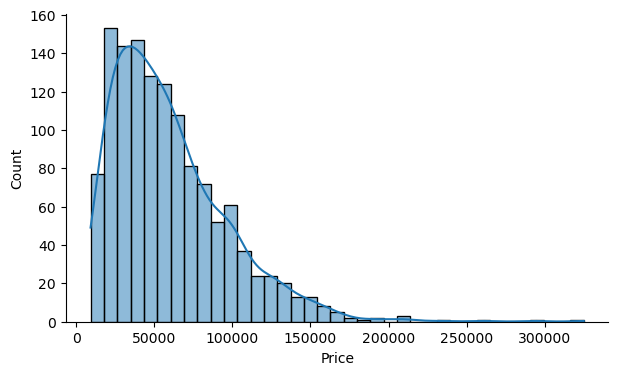

In [14]:
plt.rcParams["figure.figsize"] = (7, 4)

sns.histplot(laptops['Price'], kde=True)

sns.despine()

The target variable is **Rightly Skewed**, We can convert it into normal distribution by applying log transformation

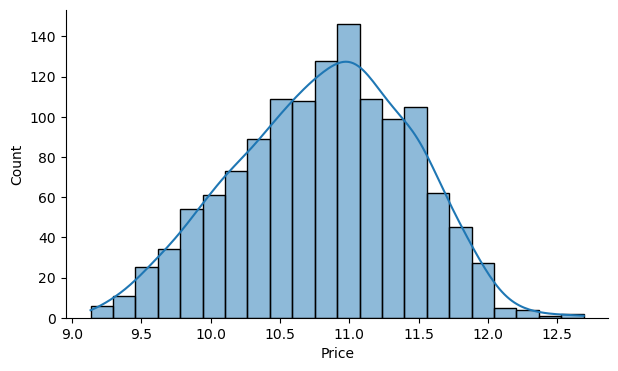

In [15]:
sns.histplot(np.log(laptops['Price']), kde=True)

sns.despine()

## Company

In [16]:
laptops["Company"].value_counts(dropna=False)

Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: Company, dtype: int64

* There are some rare labels in this variable

* We will combine all rare categories into one and we call it `Other`. This will also reduce the cardinality of this variable.

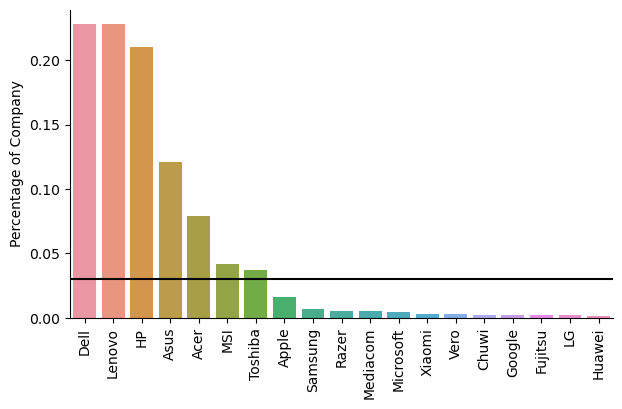

In [17]:
company_data = pd.DataFrame((laptops["Company"].value_counts()) / (len(laptops["Company"])))

sns.barplot(x=company_data.index, y=company_data['Company']).set_ylabel('Percentage of Company')

plt.axhline(0.03,color='black')
plt.xticks(rotation=90)

sns.despine()


* There are only 7 categories appear more that 3% and all others are appears less than 3%. Therefore we can combine all the categories appear below 3% into one i.e.`Other`

In [18]:
list1 = laptops["Company"].value_counts(dropna=False)[8:].index

laptops["Company"] = np.where(laptops["Company"].isin(list1), "Other", laptops["Company"])

laptops["Company"].value_counts(dropna=False)

Dell       297
Lenovo     297
HP         274
Asus       158
Acer       103
MSI         54
Other       51
Toshiba     48
Apple       21
Name: Company, dtype: int64

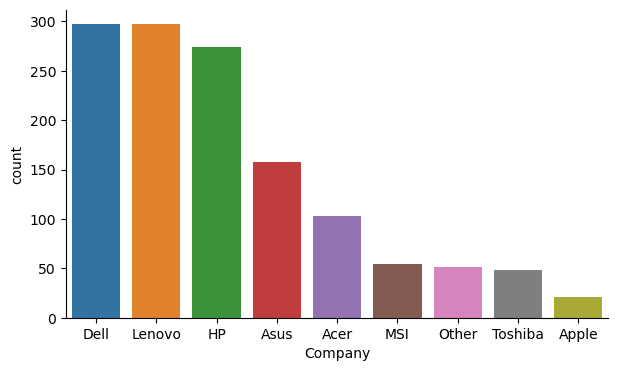

In [19]:
sns.countplot(x='Company', data=laptops, order = laptops['Company'].value_counts().index)

sns.despine()

* Now each category has enough number of values

In [20]:
## We create a function to plot the box plot

def num_variable_plot(df, predictor, target):
    sns.boxplot(x=predictor, y=target, data=df)
    plt.title(f'Box plot of {predictor} vs {target}')
    sns.despine()
    plt.show()

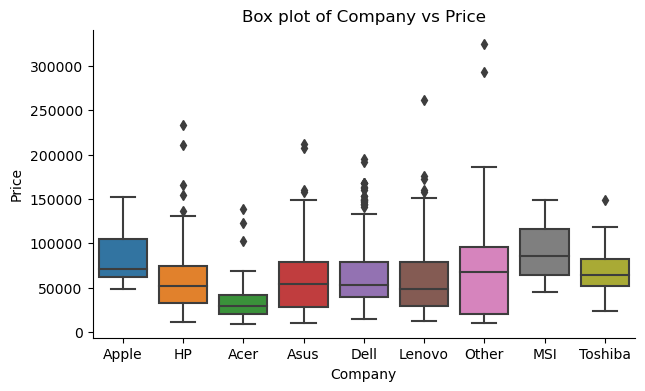

In [21]:
num_variable_plot(laptops, 'Company', 'Price')

* In the above visualisation, we can see that difference in **mean** of each category.

* We will confirm this by performing statistical test i.e. **ANOVA Test**

In [22]:
## We create a function to perform statistical ANOVA test

def anova_test(data, predictor, target):
    ## Statistical test to check the correlation between predictor and target variable
    print('ANOVA Test:','\n')
    print('Analysis of variance(ANOVA) is used to check if there is any relationship between the given categorical and continuous variable.','\n')
    print('        * Null Hypothesis(H0): There is NO relationship between two variables')
    print('        * Alternative Hypothesis(H1): There is a significant relationship between two variables', '\n')
    print('Here we will try to reject the Null Hypothesis based on p-value', '\n')
    
    groups = data.groupby(predictor)[target]
    group_values = [group for name, group in groups]
    result = f_oneway(*group_values)
    print('ANOVA Test Score:')
    print(result, '\n')
    
     ## Check the p_value
    print(f'F-statistics = {result[0]}','\n')
    
    if result[1] < 0.05:
        print(f'* P_value = {result[1]}. It is a less than 0.05, it means we can reject the Null Hypothesis')
        print(f'* There is a significant relationship between {predictor} and {target}')
    else:
        print(f'* P_value = {result[1]}. It is a greater than 0.05, it means we fail to reject the Null Hypothesis')
        print(f'* There is NO relationship between {predictor} and {target}')

In [23]:
anova_test(laptops, 'Company', 'Price')

ANOVA Test: 

Analysis of variance(ANOVA) is used to check if there is any relationship between the given categorical and continuous variable. 

        * Null Hypothesis(H0): There is NO relationship between two variables
        * Alternative Hypothesis(H1): There is a significant relationship between two variables 

Here we will try to reject the Null Hypothesis based on p-value 

ANOVA Test Score:
F_onewayResult(statistic=15.683432185661713, pvalue=3.2734878901230376e-22) 

F-statistics = 15.683432185661713 

* P_value = 3.2734878901230376e-22. It is a less than 0.05, it means we can reject the Null Hypothesis
* There is a significant relationship between Company and Price


* After doing statistical test we confirmed that there is a significant relationship between `Price` and `Company`

In [24]:
laptop2 = laptops.copy()
laptop2['Price_log'] = np.log(laptops['Price'])

laptop2.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Price_log
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,11.175755
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,10.776777
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,10.329931
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,11.814476
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,11.473101


## TypeName

In [25]:
laptops["TypeName"].value_counts(dropna=False)

Notebook              727
Gaming                205
Ultrabook             196
2 in 1 Convertible    121
Workstation            29
Netbook                25
Name: TypeName, dtype: int64

* We have enough number of count across all the categories.

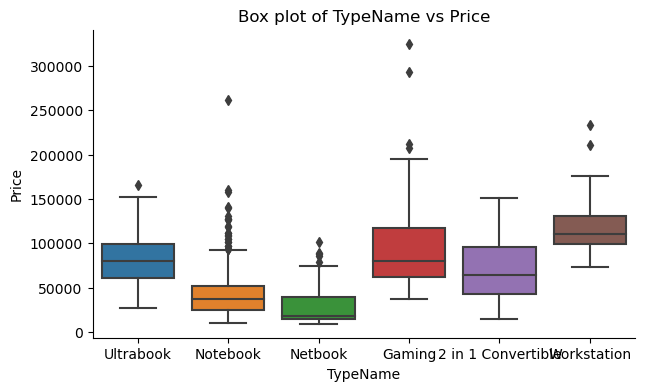

In [26]:
num_variable_plot(laptops, 'TypeName', 'Price')

* The data distribution of each category is different, it means, this variable has some relation with target variable

* We will do statistical test to get more clearity

In [27]:
anova_test(laptops, 'TypeName', 'Price')

ANOVA Test: 

Analysis of variance(ANOVA) is used to check if there is any relationship between the given categorical and continuous variable. 

        * Null Hypothesis(H0): There is NO relationship between two variables
        * Alternative Hypothesis(H1): There is a significant relationship between two variables 

Here we will try to reject the Null Hypothesis based on p-value 

ANOVA Test Score:
F_onewayResult(statistic=161.02307680163892, pvalue=2.9559816638915776e-133) 

F-statistics = 161.02307680163892 

* P_value = 2.9559816638915776e-133. It is a less than 0.05, it means we can reject the Null Hypothesis
* There is a significant relationship between TypeName and Price


* There is a significant relationship between the `TypeName` and `Price`

## Inches

In [28]:
laptops["Inches"].describe()

count    1303.000000
mean       15.017191
std         1.426304
min        10.100000
25%        14.000000
50%        15.600000
75%        15.600000
max        18.400000
Name: Inches, dtype: float64

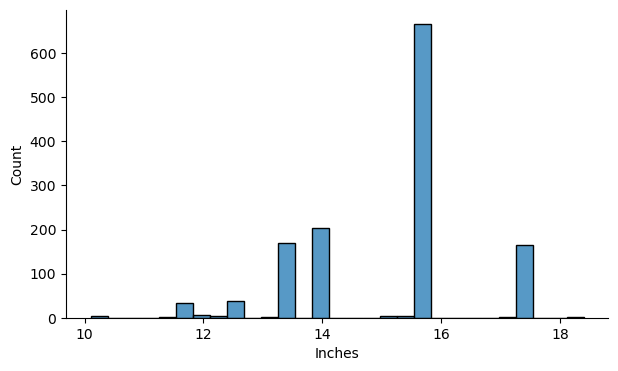

In [29]:
sns.histplot(laptops["Inches"])

sns.despine()


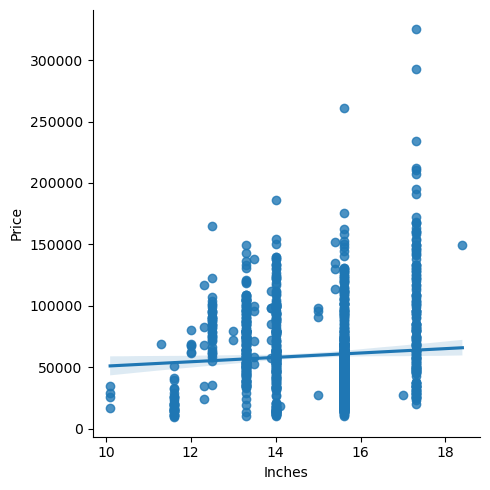

In [30]:
sns.lmplot(x="Inches", y="Price", data=laptops)

sns.despine()

In [31]:
laptops['Inches'].corr(laptops['Price'])

0.06819666592963936

In [32]:
def corr_test(data, predictor, target):
    ## Statistical test to check the correlation between predictor and target variable
    print('Correlation Test:','\n')
    print('Correlation test is used to find out is there any correlation between two variables or not?','\n')
    print('        * Null Hypothesis(H0): There is NO correlation between two variables')
    print('        * Alternative Hypothesis(H1): There is a correlation between two variables', '\n')
    print('Here we will try to reject the Null Hypothesis based on correlation score', '\n')
    
    result = data[predictor].corr(data[target])
    print('Correlation Score:', result)
    
    
#     if result <= 0.0 and >= 0.1:
#         print(f'* Correlation Score = {result[1]}. It is a less than 0.05, it means we can reject the Null Hypothesis')
#         print(f'* There is a significant relationship between {predictor} and {target}')
#     else:
#         print(f'* P_value = {result[1]}. It is a greater than 0.05, it means we fail to reject the Null Hypothesis')
#         print(f'* There is NO relationship between {predictor} and {target}')

In [33]:
corr_test(laptops, 'Inches', 'Price')

Correlation Test: 

Correlation test is used to find out is there any correlation between two variables or not? 

        * Null Hypothesis(H0): There is NO correlation between two variables
        * Alternative Hypothesis(H1): There is a correlation between two variables 

Here we will try to reject the Null Hypothesis based on correlation score 

Correlation Score: 0.06819666592963936


* We have correlation score less than 0.1, it means, there is a **Weak Correlation** between `Inches` and `Price`

* This variable has very low influence of price

## ScreenResolution

In [34]:
laptops["ScreenResolution"].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

* We have a lot of rare categories and this variable has a high cardinality.
* We can't use this variable directly for ML model.
* We will try to extract useful information.

In [35]:
laptops["ScreenResolution"].str[-9:]

0       2560x1600
1        1440x900
2       1920x1080
3       2880x1800
4       2560x1600
          ...    
1298    1920x1080
1299    3200x1800
1300     1366x768
1301     1366x768
1302     1366x768
Name: ScreenResolution, Length: 1303, dtype: object

In [36]:
laptops["IPS"] = laptops["ScreenResolution"].apply(lambda x:"Yes" if "IPS" in x else "No")
laptops["Touchscreen"] = laptops["ScreenResolution"].apply(lambda x:"Yes" if "Touchscreen" in x else "No")

In [37]:
laptops["ScreenResolution"] = laptops["ScreenResolution"].str[-9:]

laptops.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,IPS,Touchscreen
0,Apple,Ultrabook,13.3,2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,Yes,No
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,No,No
2,HP,Notebook,15.6,1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,No,No
3,Apple,Ultrabook,15.4,2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,Yes,No
4,Apple,Ultrabook,13.3,2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,Yes,No


* We have created 3 new variables from ScreenResolutions

In [38]:
laptops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  IPS               1303 non-null   object 
 12  Touchscreen       1303 non-null   object 
dtypes: float32(1), float64(2), int32(1), object(9)
memory usage: 122.3+ KB


In [39]:
laptops["ScreenResolution"].value_counts(dropna=False)

1920x1080    841
1366x768     281
3840x2160     43
3200x1800     27
 1366x768     27
2560x1440     23
1600x900      23
2560x1600      6
2304x1440      6
2256x1504      6
1920x1200      5
1440x900       4
2880x1800      4
2400x1600      4
2160x1440      2
2736x1824      1
Name: ScreenResolution, dtype: int64

* Here also we can see some rare categories, therefore we can combine them and create new category

In [40]:
laptops["ScreenResolution"].unique()

array(['2560x1600', '1440x900', '1920x1080', '2880x1800', '1366x768',
       '2304x1440', '3200x1800', '1920x1200', '2256x1504', ' 1366x768',
       '3840x2160', '2160x1440', '2560x1440', '1600x900', '2736x1824',
       '2400x1600'], dtype=object)

In [41]:
ScreenResolution_list = ["1920x1080","1366x768","3840x2160","3200x1800","1366x768","2560x1440","1600x900"]

In [42]:
def screenresolution_fun(var):
    if "1920x1080" in var:
        return "1920x1080"
    elif "1366x768" in var:
        return "1366x768"
    elif "3840x2160" in var:
        return "3840x2160"
    elif "3200x1800" in var:
        return "3200x1800"
    elif "1366x768" in var:
        return "1366x768"
    elif "2560x1440" in var:
        return "2560x1440"
    elif "1600x900" in var:
        return "1600x900"
    else:
        return "other"

In [43]:
laptops["ScreenResolution"].apply(screenresolution_fun)

0           other
1           other
2       1920x1080
3           other
4           other
          ...    
1298    1920x1080
1299    3200x1800
1300     1366x768
1301     1366x768
1302     1366x768
Name: ScreenResolution, Length: 1303, dtype: object

In [44]:
laptops["ScreenResolution"] = laptops["ScreenResolution"].apply(screenresolution_fun)

laptops.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,IPS,Touchscreen
0,Apple,Ultrabook,13.3,other,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,Yes,No
1,Apple,Ultrabook,13.3,other,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,No,No
2,HP,Notebook,15.6,1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,No,No
3,Apple,Ultrabook,15.4,other,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,Yes,No
4,Apple,Ultrabook,13.3,other,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,Yes,No


In [45]:
laptops["ScreenResolution"].value_counts()

1920x1080    841
1366x768     308
3840x2160     43
other         38
3200x1800     27
2560x1440     23
1600x900      23
Name: ScreenResolution, dtype: int64

* Now we have enough count across all the categries

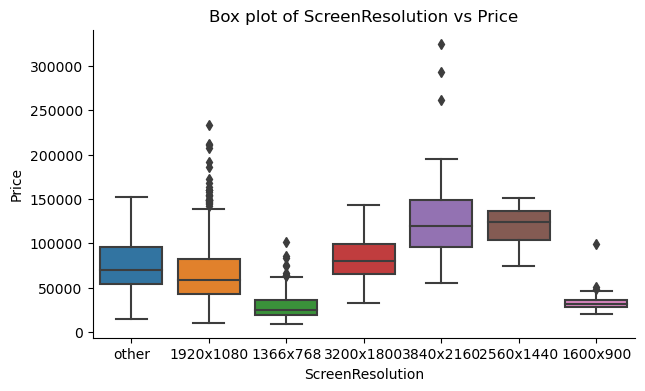

In [46]:
num_variable_plot(laptops, 'ScreenResolution', 'Price')

* By looking at above plot we can say that this variable has a relationship with target variable.
* We can test it using statistical test.

In [47]:
anova_test(laptops, 'ScreenResolution', 'Price')

ANOVA Test: 

Analysis of variance(ANOVA) is used to check if there is any relationship between the given categorical and continuous variable. 

        * Null Hypothesis(H0): There is NO relationship between two variables
        * Alternative Hypothesis(H1): There is a significant relationship between two variables 

Here we will try to reject the Null Hypothesis based on p-value 

ANOVA Test Score:
F_onewayResult(statistic=118.73793335089552, pvalue=1.391770296121539e-119) 

F-statistics = 118.73793335089552 

* P_value = 1.391770296121539e-119. It is a less than 0.05, it means we can reject the Null Hypothesis
* There is a significant relationship between ScreenResolution and Price


* We can use this variable for modeling because it has significant relationship with target variable

## IPS

In [48]:
laptops["IPS"].value_counts()

No     938
Yes    365
Name: IPS, dtype: int64

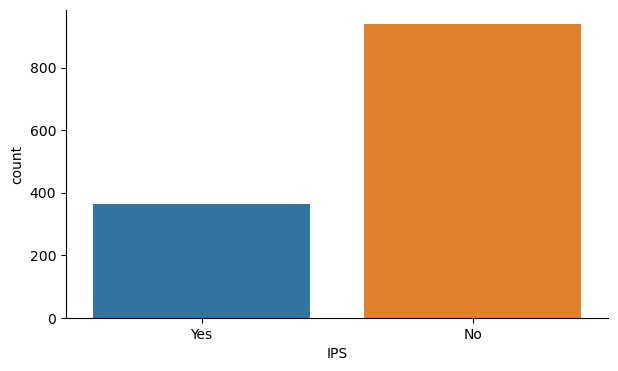

In [49]:
sns.countplot(x="IPS", data=laptops)

sns.despine()

*  Each category has enough number of values

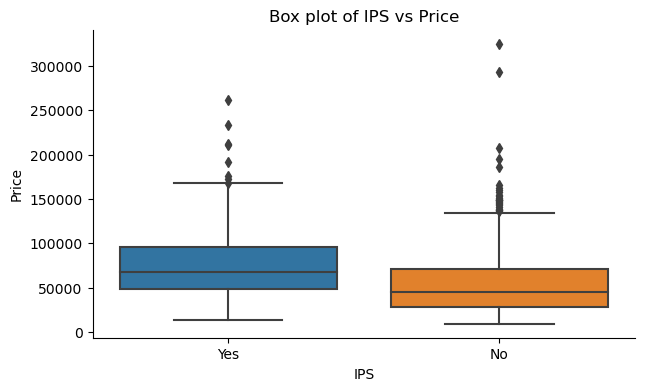

In [50]:
num_variable_plot(laptops, 'IPS', 'Price')

In [51]:
anova_test(laptops, 'IPS', 'Price')

ANOVA Test: 

Analysis of variance(ANOVA) is used to check if there is any relationship between the given categorical and continuous variable. 

        * Null Hypothesis(H0): There is NO relationship between two variables
        * Alternative Hypothesis(H1): There is a significant relationship between two variables 

Here we will try to reject the Null Hypothesis based on p-value 

ANOVA Test Score:
F_onewayResult(statistic=88.37640380868687, pvalue=2.3507614665031075e-20) 

F-statistics = 88.37640380868687 

* P_value = 2.3507614665031075e-20. It is a less than 0.05, it means we can reject the Null Hypothesis
* There is a significant relationship between IPS and Price


* These variables have a relationships with each other 

## Touchscreen

In [52]:
laptops["Touchscreen"].value_counts()

No     1111
Yes     192
Name: Touchscreen, dtype: int64

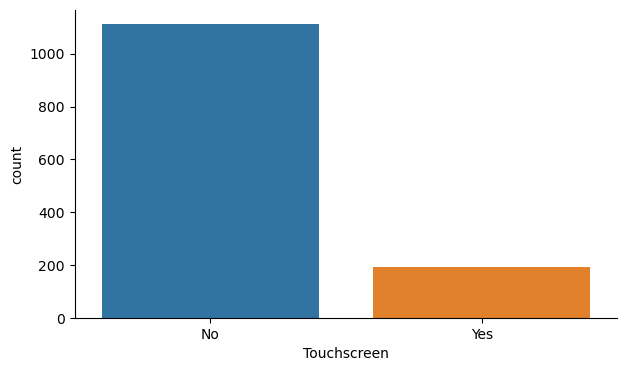

In [53]:
sns.countplot(x='Touchscreen', data=laptops)

sns.despine()

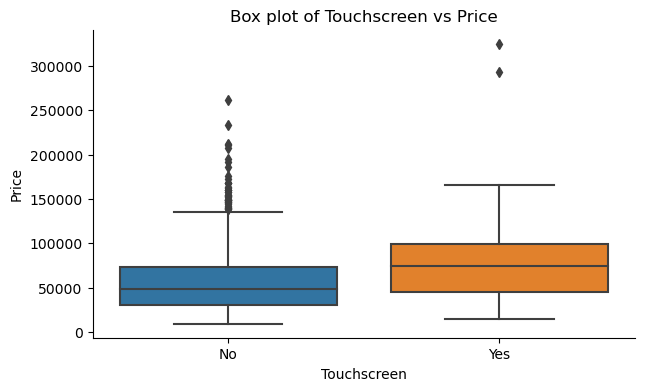

In [54]:
num_variable_plot(laptops, 'Touchscreen', 'Price')

In [55]:
anova_test(laptops, 'Touchscreen', 'Price')

ANOVA Test: 

Analysis of variance(ANOVA) is used to check if there is any relationship between the given categorical and continuous variable. 

        * Null Hypothesis(H0): There is NO relationship between two variables
        * Alternative Hypothesis(H1): There is a significant relationship between two variables 

Here we will try to reject the Null Hypothesis based on p-value 

ANOVA Test Score:
F_onewayResult(statistic=49.38010616590541, pvalue=3.3925480371436986e-12) 

F-statistics = 49.38010616590541 

* P_value = 3.3925480371436986e-12. It is a less than 0.05, it means we can reject the Null Hypothesis
* There is a significant relationship between Touchscreen and Price


* There is a significant relationship between `Touchscreen` and `Price`

## Cpu

In [56]:
pd.set_option('display.max_rows', None)
laptops["Cpu"].value_counts()

Intel Core i5 7200U 2.5GHz               190
Intel Core i7 7700HQ 2.8GHz              146
Intel Core i7 7500U 2.7GHz               134
Intel Core i7 8550U 1.8GHz                73
Intel Core i5 8250U 1.6GHz                72
Intel Core i5 6200U 2.3GHz                68
Intel Core i3 6006U 2GHz                  64
Intel Core i7 6500U 2.5GHz                49
Intel Core i7 6700HQ 2.6GHz               43
Intel Core i3 7100U 2.4GHz                37
Intel Core i5 7300HQ 2.5GHz               33
Intel Celeron Dual Core N3350 1.1GHz      30
Intel Celeron Dual Core N3060 1.6GHz      28
Intel Core i7 6600U 2.6GHz                18
Intel Core i3 6006U 2.0GHz                16
Intel Pentium Quad Core N4200 1.1GHz      14
Intel Core i5 7300U 2.6GHz                14
Intel Core i7 7600U 2.8GHz                13
Intel Pentium Quad Core N3710 1.6GHz      11
AMD A9-Series 9420 3GHz                   11
Intel Core i5 6300U 2.4GHz                11
Intel Celeron Dual Core N3050 1.6GHz      11
Intel Core

* We have a lot of rare categories and this variable has a high cardinality.
* We can't use this variable directly for ML model.
* We will try to extract useful information.

In [57]:
pd.reset_option('display.max_rows')

laptops["Cpu"].str.split()

0                         [Intel, Core, i5, 2.3GHz]
1                         [Intel, Core, i5, 1.8GHz]
2                  [Intel, Core, i5, 7200U, 2.5GHz]
3                         [Intel, Core, i7, 2.7GHz]
4                         [Intel, Core, i5, 3.1GHz]
                           ...                     
1298               [Intel, Core, i7, 6500U, 2.5GHz]
1299               [Intel, Core, i7, 6500U, 2.5GHz]
1300    [Intel, Celeron, Dual, Core, N3050, 1.6GHz]
1301               [Intel, Core, i7, 6500U, 2.5GHz]
1302    [Intel, Celeron, Dual, Core, N3050, 1.6GHz]
Name: Cpu, Length: 1303, dtype: object

In [58]:
laptops["CPU_name"]=laptops["Cpu"].apply(lambda x:" ".join(x.split()[0:3]))

laptops.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,IPS,Touchscreen,CPU_name
0,Apple,Ultrabook,13.3,other,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,Yes,No,Intel Core i5
1,Apple,Ultrabook,13.3,other,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,No,No,Intel Core i5
2,HP,Notebook,15.6,1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,No,No,Intel Core i5
3,Apple,Ultrabook,15.4,other,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,Yes,No,Intel Core i7
4,Apple,Ultrabook,13.3,other,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,Yes,No,Intel Core i5


In [59]:
laptops["CPU_name"].value_counts()

Intel Core i7               527
Intel Core i5               423
Intel Core i3               136
Intel Celeron Dual           80
Intel Pentium Quad           27
Intel Core M                 19
AMD A9-Series 9420           12
Intel Celeron Quad            8
AMD A6-Series 9220            8
AMD A12-Series 9720P          7
Intel Atom x5-Z8350           5
AMD A8-Series 7410            4
Intel Atom x5-Z8550           4
Intel Pentium Dual            3
AMD A9-Series 9410            3
AMD Ryzen 1700                3
AMD A9-Series A9-9420         2
AMD A10-Series 9620P          2
Intel Atom X5-Z8350           2
AMD E-Series E2-9000e         2
Intel Xeon E3-1535M           2
Intel Xeon E3-1505M           2
AMD E-Series 7110             2
AMD A10-Series 9600P          2
AMD A6-Series A6-9220         2
AMD A10-Series A10-9620P      2
AMD Ryzen 1600                1
Intel Atom x5-Z8300           1
AMD E-Series E2-6110          1
AMD FX 9830P                  1
AMD E-Series E2-9000          1
AMD A6-S

* Still we have a lot of rare categories

In [60]:
def fun_cpu(text):
    if text=="Intel Core i7" or text=="Intel Core i5" or text=="Intel Core i3":
        return text
    elif text.split()[0]=="Intel":
        return "Other Intel Processor"
    else:
        return "AMD Processor"

In [61]:
laptops["CPU_Brand"] = laptops["CPU_name"].apply(fun_cpu)

laptops.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,IPS,Touchscreen,CPU_name,CPU_Brand
0,Apple,Ultrabook,13.3,other,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,Yes,No,Intel Core i5,Intel Core i5
1,Apple,Ultrabook,13.3,other,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,No,No,Intel Core i5,Intel Core i5
2,HP,Notebook,15.6,1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,No,No,Intel Core i5,Intel Core i5
3,Apple,Ultrabook,15.4,other,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,Yes,No,Intel Core i7,Intel Core i7
4,Apple,Ultrabook,13.3,other,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,Yes,No,Intel Core i5,Intel Core i5


In [62]:
laptops["CPU_Brand"].value_counts()

Intel Core i7            527
Intel Core i5            423
Other Intel Processor    154
Intel Core i3            136
AMD Processor             63
Name: CPU_Brand, dtype: int64

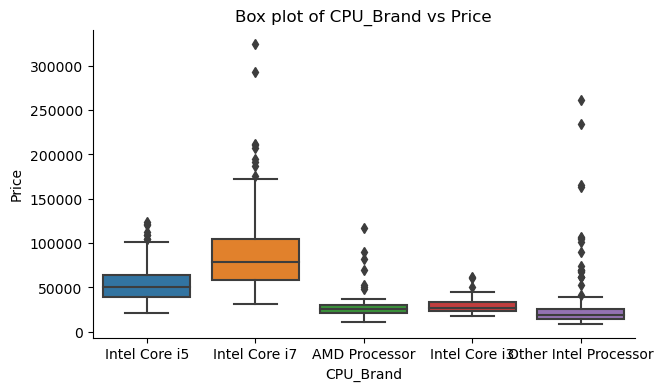

In [63]:
num_variable_plot(laptops, 'CPU_Brand', 'Price')

In [64]:
anova_test(laptops, 'CPU_Brand', 'Price')

ANOVA Test: 

Analysis of variance(ANOVA) is used to check if there is any relationship between the given categorical and continuous variable. 

        * Null Hypothesis(H0): There is NO relationship between two variables
        * Alternative Hypothesis(H1): There is a significant relationship between two variables 

Here we will try to reject the Null Hypothesis based on p-value 

ANOVA Test Score:
F_onewayResult(statistic=195.27385911111202, pvalue=4.0144440011798775e-131) 

F-statistics = 195.27385911111202 

* P_value = 4.0144440011798775e-131. It is a less than 0.05, it means we can reject the Null Hypothesis
* There is a significant relationship between CPU_Brand and Price


* There is a significant relationship between `CPU_Brand` and `Price`

In [65]:
#laptops["CPU_freq(GHz)"]=laptops['Cpu'].str.extract(r'(\d+(?:\.\d+)?GHz)') 
#laptops["CPU_freq(GHz)"] = laptops["CPU_freq(GHz)"].str.replace("GHz", "")
#laptops["CPU_freq(GHz)"] = laptops["CPU_freq(GHz)"].astype("float32")

#laptops.head()

In [66]:
#sns.histplot(laptops["CPU_freq(GHz)"]);

In [67]:
#sns.scatterplot(x="CPU_freq(GHz)", y="Price", data=laptops)
#sns.despine()

In [68]:
laptops.drop(["Cpu", "CPU_name"], axis=1, inplace=True)

## RAM

In [69]:
laptops["Ram"].value_counts()

8     619
4     375
16    200
6      41
12     25
2      22
32     17
24      3
64      1
Name: Ram, dtype: int64

* We have some rare category.
* We can combine them

In [70]:
laptops["Ram"].dtype

dtype('int32')

In [71]:
pd.Series(np.where(laptops["Ram"] <=16, laptops["Ram"], "24+")).value_counts()

8      619
4      375
16     200
6       41
12      25
2       22
24+     21
dtype: int64

In [72]:
laptops["Ram"] = np.where(laptops["Ram"] <=16, laptops["Ram"], "24+")

In [73]:
laptops["Ram"].value_counts()

8      619
4      375
16     200
6       41
12      25
2       22
24+     21
Name: Ram, dtype: int64

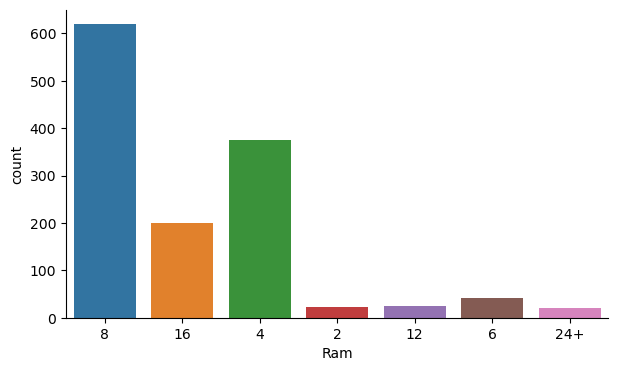

In [74]:
sns.countplot(x='Ram', data=laptops)

sns.despine()

* Still some categories have fewer values
* For now we will keep this variable for further analysis

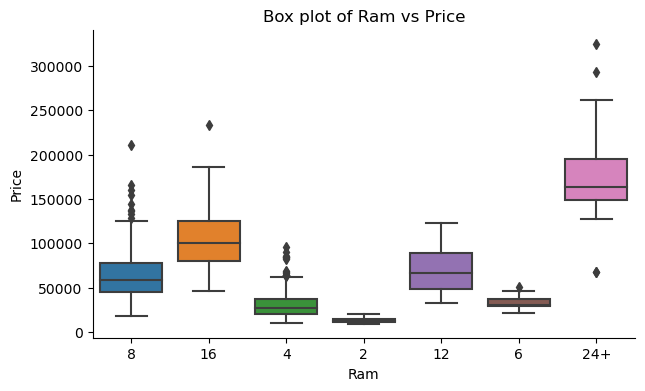

In [75]:
num_variable_plot(laptops, 'Ram', 'Price')

In [76]:
anova_test(laptops, 'Ram', 'Price')

ANOVA Test: 

Analysis of variance(ANOVA) is used to check if there is any relationship between the given categorical and continuous variable. 

        * Null Hypothesis(H0): There is NO relationship between two variables
        * Alternative Hypothesis(H1): There is a significant relationship between two variables 

Here we will try to reject the Null Hypothesis based on p-value 

ANOVA Test Score:
F_onewayResult(statistic=302.95422665787174, pvalue=1.513499600011476e-242) 

F-statistics = 302.95422665787174 

* P_value = 1.513499600011476e-242. It is a less than 0.05, it means we can reject the Null Hypothesis
* There is a significant relationship between Ram and Price


* There is a significant relationship between `Ram` and `Price`

## Memory

In [77]:
laptops["Memory"].value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

* We have a lot of rare categories and this variable has a high cardinality.
* We can't use this variable directly for ML model.
* We will try to extract useful information.

In [78]:
## Remove '.0' 

laptops['Memory'] = laptops['Memory'].astype(str).replace('\.0', '', regex=True)

In [79]:
temp = laptops["Memory"].str.split("+", expand=True)

temp.head()

,0,1
0,128GB SSD,None
1,128GB Flash Storage,None
2,256GB SSD,None
3,512GB SSD,None
4,256GB SSD,None


In [80]:
temp[0] = temp[0].str.replace("GB",'')
temp[0] = temp[0].str.replace("TB",'000')
temp[1] = temp[1].str.replace("GB",'')
temp[1] = temp[1].str.replace("TB",'000')

temp

,0,1
0,128 SSD,None
1,128 Flash Storage,None
2,256 SSD,None
3,512 SSD,None
4,256 SSD,None
...,...,...
1298,128 SSD,None
1299,512 SSD,None
1300,64 Flash Storage,None
1301,1000 HDD,None


In [81]:
temp[1].fillna("0", inplace=True)

temp["SSD_1"] = temp[0].apply(lambda x:1 if "SSD" in x else 0)
temp["SSD_2"] = temp[1].apply(lambda x:1 if "SSD" in x else 0)
temp["HDD_1"] = temp[0].apply(lambda x:1 if "HDD" in x else 0)
temp["HDD_2"] = temp[1].apply(lambda x:1 if "HDD" in x else 0)
temp["Flash Storage_1"] = temp[0].apply(lambda x:1 if "Flash Storage" in x else 0)
temp["Flash Storage_2"] = temp[1].apply(lambda x:1 if "Flash Storage" in x else 0)
temp["Hybrid_1"] = temp[0].apply(lambda x:1 if "Hybrid" in x else 0)
temp["Hybrid_2"] = temp[1].apply(lambda x:1 if "Hybrid" in x else 0)

temp.head()

,0,1,SSD_1,SSD_2,HDD_1,HDD_2,Flash Storage_1,Flash Storage_2,Hybrid_1,Hybrid_2
0,128 SSD,0,1,0,0,0,0,0,0,0
1,128 Flash Storage,0,0,0,0,0,1,0,0,0
2,256 SSD,0,1,0,0,0,0,0,0,0
3,512 SSD,0,1,0,0,0,0,0,0,0
4,256 SSD,0,1,0,0,0,0,0,0,0


In [82]:
temp[0] = temp[0].str.replace(r'\D', '', regex=True)
temp[1] = temp[1].str.replace(r'\D', '', regex=True)

temp.head()

,0,1,SSD_1,SSD_2,HDD_1,HDD_2,Flash Storage_1,Flash Storage_2,Hybrid_1,Hybrid_2
0,128,0,1,0,0,0,0,0,0,0
1,128,0,0,0,0,0,1,0,0,0
2,256,0,1,0,0,0,0,0,0,0
3,512,0,1,0,0,0,0,0,0,0
4,256,0,1,0,0,0,0,0,0,0


In [83]:
temp[0] = temp[0].astype("int32")
temp[1] = temp[1].astype("int32")

In [84]:
temp["SSD"] = (temp["SSD_1"] * temp[0]) + (temp["SSD_2"] * temp[1])
temp["HDD"] = (temp["HDD_1"] * temp[0]) + (temp["HDD_2"] * temp[1])
temp["Flash_Storage"] = (temp["Flash Storage_1"] * temp[0]) + (temp["Flash Storage_2"] * temp[1])
temp["Hybrid"] = (temp["Hybrid_1"] * temp[0]) + (temp["Hybrid_2"] * temp[1])

temp.head()

,0,1,SSD_1,SSD_2,HDD_1,HDD_2,Flash Storage_1,Flash Storage_2,Hybrid_1,Hybrid_2,SSD,HDD,Flash_Storage,Hybrid
0,128,0,1,0,0,0,0,0,0,0,128,0,0,0
1,128,0,0,0,0,0,1,0,0,0,0,0,128,0
2,256,0,1,0,0,0,0,0,0,0,256,0,0,0
3,512,0,1,0,0,0,0,0,0,0,512,0,0,0
4,256,0,1,0,0,0,0,0,0,0,256,0,0,0


In [85]:
temp = temp.loc[:,["SSD", "HDD", "Flash_Storage", "Hybrid"]]



In [86]:
laptops = laptops.merge(temp,
                       right_index = True,
                       left_index = True,
                       how = "inner")

laptops.drop("Memory", axis=1, inplace=True)

laptops.head()

,Company,TypeName,Inches,ScreenResolution,Ram,Gpu,OpSys,Weight,Price,IPS,Touchscreen,CPU_Brand,SSD,HDD,Flash_Storage,Hybrid
0,Apple,Ultrabook,13.3,other,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,Yes,No,Intel Core i5,128,0,0,0
1,Apple,Ultrabook,13.3,other,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,No,No,Intel Core i5,0,0,128,0
2,HP,Notebook,15.6,1920x1080,8,Intel HD Graphics 620,No OS,1.86,30636.0000,No,No,Intel Core i5,256,0,0,0
3,Apple,Ultrabook,15.4,other,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,Yes,No,Intel Core i7,512,0,0,0
4,Apple,Ultrabook,13.3,other,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,Yes,No,Intel Core i5,256,0,0,0


In [87]:
laptops["SSD"].value_counts()

256     498
0       460
128     172
512     138
1000     16
32        6
180       5
16        3
64        1
1024      1
768       1
240       1
8         1
Name: SSD, dtype: int64

* We have some rare categories, we will combine them into one category

In [88]:
def ssd_fun(var):
    if var == 0:
        return "No SSD"
    elif var > 1 and var <= 128:
        return "128GB and less"
    elif var == 256 or var == 180 or var == 240:
        return "256GB"
    elif var == 512 or var == 768:
        return "512GB"
    else:
        return "1TB"    

In [89]:
pd.Series(laptops["SSD"].apply(ssd_fun)).value_counts()

256GB             504
No SSD            460
128GB and less    183
512GB             139
1TB                17
Name: SSD, dtype: int64

In [90]:
laptops["SSD"] = laptops["SSD"].apply(ssd_fun)

In [91]:
laptops["SSD"].value_counts()

256GB             504
No SSD            460
128GB and less    183
512GB             139
1TB                17
Name: SSD, dtype: int64

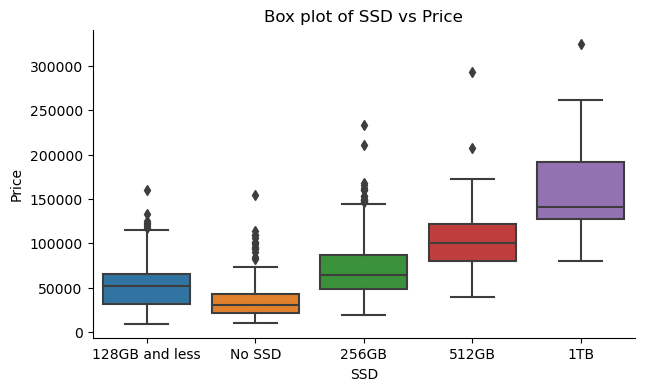

In [92]:
num_variable_plot(laptops, 'SSD', 'Price')

* When memory increase price also increase.

In [93]:
anova_test(laptops, 'SSD', 'Price')

ANOVA Test: 

Analysis of variance(ANOVA) is used to check if there is any relationship between the given categorical and continuous variable. 

        * Null Hypothesis(H0): There is NO relationship between two variables
        * Alternative Hypothesis(H1): There is a significant relationship between two variables 

Here we will try to reject the Null Hypothesis based on p-value 

ANOVA Test Score:
F_onewayResult(statistic=265.3694789247581, pvalue=1.0582056592677063e-166) 

F-statistics = 265.3694789247581 

* P_value = 1.0582056592677063e-166. It is a less than 0.05, it means we can reject the Null Hypothesis
* There is a significant relationship between SSD and Price


* There is a significant relationship between `SSD` and `Price`

## HDD

In [94]:
laptops["HDD"].value_counts()

0       727
1000    408
500     134
2000     32
32        1
128       1
Name: HDD, dtype: int64

* Two categories have one value each so we are deleting this categories

In [95]:
hdd_list = [32, 128]

laptops.drop(laptops.loc[laptops["HDD"].isin(hdd_list)].index, axis=0, inplace=True)

In [96]:
laptops["HDD"].value_counts()

0       727
1000    408
500     134
2000     32
Name: HDD, dtype: int64

In [97]:
def hdd_fun(var):
    if var == 0:
        return "No HDD"
    elif var == 500:
        return "512GB"
    elif var == 1000:
        return "1TB"
    else:
        return "2TB"

In [98]:
laptops["HDD"].apply(hdd_fun).value_counts()

No HDD    727
1TB       408
512GB     134
2TB        32
Name: HDD, dtype: int64

In [99]:
laptops["HDD"] = laptops["HDD"].apply(hdd_fun)

In [100]:
laptops["HDD"].value_counts()

No HDD    727
1TB       408
512GB     134
2TB        32
Name: HDD, dtype: int64

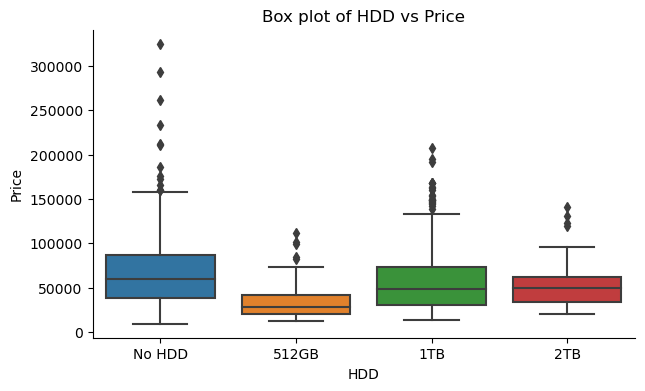

In [101]:
num_variable_plot(laptops, 'HDD', 'Price')

In [102]:
anova_test(laptops, 'HDD', 'Price')

ANOVA Test: 

Analysis of variance(ANOVA) is used to check if there is any relationship between the given categorical and continuous variable. 

        * Null Hypothesis(H0): There is NO relationship between two variables
        * Alternative Hypothesis(H1): There is a significant relationship between two variables 

Here we will try to reject the Null Hypothesis based on p-value 

ANOVA Test Score:
F_onewayResult(statistic=28.801467435710848, pvalue=4.982385854937442e-18) 

F-statistics = 28.801467435710848 

* P_value = 4.982385854937442e-18. It is a less than 0.05, it means we can reject the Null Hypothesis
* There is a significant relationship between HDD and Price


* There is a significant relationship between `HDD` and `Price`

## Flash_Storage

In [103]:
laptops["Flash_Storage"].value_counts()

0      1226
32       38
64       16
256       8
16        7
128       4
512       2
Name: Flash_Storage, dtype: int64

* Most of the laptops don't have Flash storage.
* There are some but have very fewer count for each.
* We can combine all the laptops which has flash storage into one category and call it **Yes**

In [104]:
def flash_storage_fun(var):
    if var == 0:
        return "No"
    else:
        return "Yes"

In [105]:
laptops["Flash_Storage"].apply(flash_storage_fun).value_counts()

No     1226
Yes      75
Name: Flash_Storage, dtype: int64

In [106]:
laptops["Flash_Storage"] = laptops["Flash_Storage"].apply(flash_storage_fun)

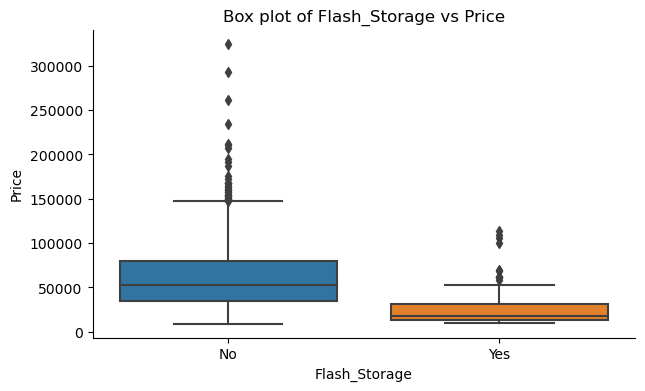

In [107]:
num_variable_plot(laptops, 'Flash_Storage', 'Price')

In [108]:
anova_test(laptops, 'Flash_Storage', 'Price')

ANOVA Test: 

Analysis of variance(ANOVA) is used to check if there is any relationship between the given categorical and continuous variable. 

        * Null Hypothesis(H0): There is NO relationship between two variables
        * Alternative Hypothesis(H1): There is a significant relationship between two variables 

Here we will try to reject the Null Hypothesis based on p-value 

ANOVA Test Score:
F_onewayResult(statistic=60.75718077811348, pvalue=1.3155514748035137e-14) 

F-statistics = 60.75718077811348 

* P_value = 1.3155514748035137e-14. It is a less than 0.05, it means we can reject the Null Hypothesis
* There is a significant relationship between Flash_Storage and Price


* There is a significant relationship between `Flash_Storage` and `Price`

## Hybrid

In [109]:
laptops["Hybrid"].value_counts()

0       1289
1000      11
508        1
Name: Hybrid, dtype: int64

* We can drop this column because we have few laptops which has **Hybrid** memory

In [110]:
## We will drop this column because we have very less data of laptops which has hybrid storage

laptops.drop("Hybrid",axis=1, inplace=True)

In [111]:
laptops.head()

,Company,TypeName,Inches,ScreenResolution,Ram,Gpu,OpSys,Weight,Price,IPS,Touchscreen,CPU_Brand,SSD,HDD,Flash_Storage
0,Apple,Ultrabook,13.3,other,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,Yes,No,Intel Core i5,128GB and less,No HDD,No
1,Apple,Ultrabook,13.3,other,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,No,No,Intel Core i5,No SSD,No HDD,Yes
2,HP,Notebook,15.6,1920x1080,8,Intel HD Graphics 620,No OS,1.86,30636.0000,No,No,Intel Core i5,256GB,No HDD,No
3,Apple,Ultrabook,15.4,other,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,Yes,No,Intel Core i7,512GB,No HDD,No
4,Apple,Ultrabook,13.3,other,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,Yes,No,Intel Core i5,256GB,No HDD,No


## Gpu

In [112]:
laptops["Gpu"].value_counts(dropna=False)

Intel HD Graphics 620      280
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: Gpu, Length: 110, dtype: int64

* We have a lot of rare categories and this variable has a high cardinality.
* We can't use this variable directly for ML model.
* We will try to extract useful information.

In [113]:
def GPU(text):
    if ("Intel").lower() in text.lower():
        return "Intel"
    elif ("AMD").lower() in text.lower():
        return "AMD"
    elif ("Nvidia").lower() in text.lower():
        return "Nvidia"
    else:
        return "Other"

In [114]:
laptops["GPU_brand"] = laptops["Gpu"].apply(GPU)

laptops["GPU_brand"].value_counts(dropna=True)

Intel     720
Nvidia    400
AMD       180
Other       1
Name: GPU_brand, dtype: int64

* We have only Gpu brand laptop which has other Gpu then Intel, Nvidia and AMD
* We can delete this row

In [115]:
laptops = laptops[laptops["GPU_brand"]!="Other"]

laptops["GPU_brand"].value_counts(dropna=True)

Intel     720
Nvidia    400
AMD       180
Name: GPU_brand, dtype: int64

In [116]:
laptops.drop("Gpu", axis=1, inplace=True)

laptops.head()

,Company,TypeName,Inches,ScreenResolution,Ram,OpSys,Weight,Price,IPS,Touchscreen,CPU_Brand,SSD,HDD,Flash_Storage,GPU_brand
0,Apple,Ultrabook,13.3,other,8,macOS,1.37,71378.6832,Yes,No,Intel Core i5,128GB and less,No HDD,No,Intel
1,Apple,Ultrabook,13.3,other,8,macOS,1.34,47895.5232,No,No,Intel Core i5,No SSD,No HDD,Yes,Intel
2,HP,Notebook,15.6,1920x1080,8,No OS,1.86,30636.0000,No,No,Intel Core i5,256GB,No HDD,No,Intel
3,Apple,Ultrabook,15.4,other,16,macOS,1.83,135195.3360,Yes,No,Intel Core i7,512GB,No HDD,No,AMD
4,Apple,Ultrabook,13.3,other,8,macOS,1.37,96095.8080,Yes,No,Intel Core i5,256GB,No HDD,No,Intel


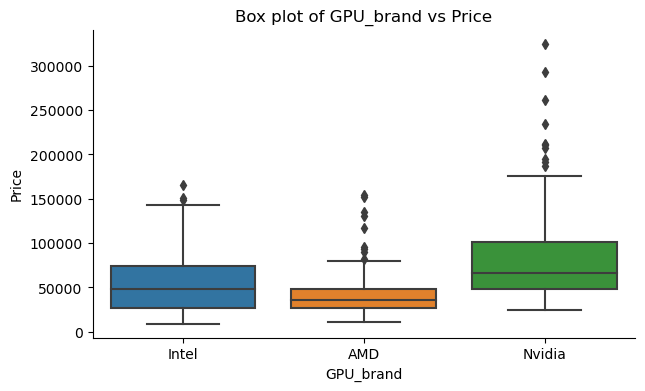

In [117]:
num_variable_plot(laptops, 'GPU_brand', 'Price')

In [118]:
anova_test(laptops, 'GPU_brand', 'Price')

ANOVA Test: 

Analysis of variance(ANOVA) is used to check if there is any relationship between the given categorical and continuous variable. 

        * Null Hypothesis(H0): There is NO relationship between two variables
        * Alternative Hypothesis(H1): There is a significant relationship between two variables 

Here we will try to reject the Null Hypothesis based on p-value 

ANOVA Test Score:
F_onewayResult(statistic=99.92234031288177, pvalue=4.35973095548904e-41) 

F-statistics = 99.92234031288177 

* P_value = 4.35973095548904e-41. It is a less than 0.05, it means we can reject the Null Hypothesis
* There is a significant relationship between GPU_brand and Price


* There is a significant relationship between `GPU_brand` and `Price`

## OpSys

In [119]:
laptops["OpSys"].value_counts()

Windows 10      1070
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

* We have some of rare categories.
* We can't use this variable directly for ML model.
* We will try to extract useful information.

In [120]:
def os_fetch(text):
    if text=="Windows 10" or text=="Windows 7" or text=="Windows 10 S":
        return "Windows"
    elif text=="macOS" or text=="Mac OS X":
        return "Mac"
    elif text=="Linux":
        return "Linux"
    elif text=="No OS":
        return "No OS"
    else:
        return "Other"

In [121]:
laptops["OpSys"] = laptops["OpSys"].apply(os_fetch)

laptops.head()

,Company,TypeName,Inches,ScreenResolution,Ram,OpSys,Weight,Price,IPS,Touchscreen,CPU_Brand,SSD,HDD,Flash_Storage,GPU_brand
0,Apple,Ultrabook,13.3,other,8,Mac,1.37,71378.6832,Yes,No,Intel Core i5,128GB and less,No HDD,No,Intel
1,Apple,Ultrabook,13.3,other,8,Mac,1.34,47895.5232,No,No,Intel Core i5,No SSD,No HDD,Yes,Intel
2,HP,Notebook,15.6,1920x1080,8,No OS,1.86,30636.0000,No,No,Intel Core i5,256GB,No HDD,No,Intel
3,Apple,Ultrabook,15.4,other,16,Mac,1.83,135195.3360,Yes,No,Intel Core i7,512GB,No HDD,No,AMD
4,Apple,Ultrabook,13.3,other,8,Mac,1.37,96095.8080,Yes,No,Intel Core i5,256GB,No HDD,No,Intel


In [122]:
laptops["OpSys"].value_counts()

Windows    1123
No OS        66
Linux        62
Other        28
Mac          21
Name: OpSys, dtype: int64

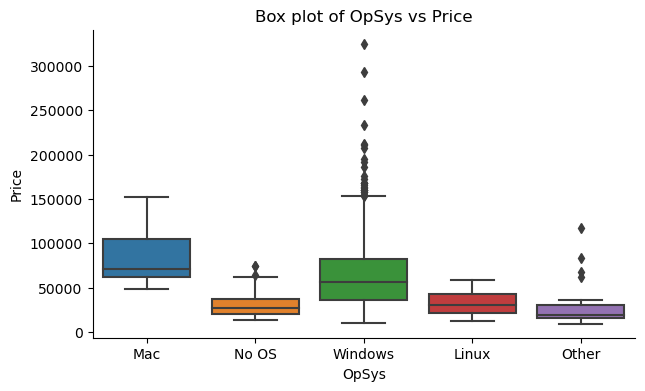

In [123]:
num_variable_plot(laptops, 'OpSys', 'Price')

In [124]:
anova_test(laptops, 'OpSys', 'Price')

ANOVA Test: 

Analysis of variance(ANOVA) is used to check if there is any relationship between the given categorical and continuous variable. 

        * Null Hypothesis(H0): There is NO relationship between two variables
        * Alternative Hypothesis(H1): There is a significant relationship between two variables 

Here we will try to reject the Null Hypothesis based on p-value 

ANOVA Test Score:
F_onewayResult(statistic=29.804454154473298, pvalue=9.556901604694106e-24) 

F-statistics = 29.804454154473298 

* P_value = 9.556901604694106e-24. It is a less than 0.05, it means we can reject the Null Hypothesis
* There is a significant relationship between OpSys and Price


* There is a significant relationship between OpSys and Price

## Weight

In [125]:
laptops["Weight"].describe()

count    1300.000000
mean        2.039708
std         0.665510
min         0.690000
25%         1.500000
50%         2.040000
75%         2.300000
max         4.700000
Name: Weight, dtype: float64

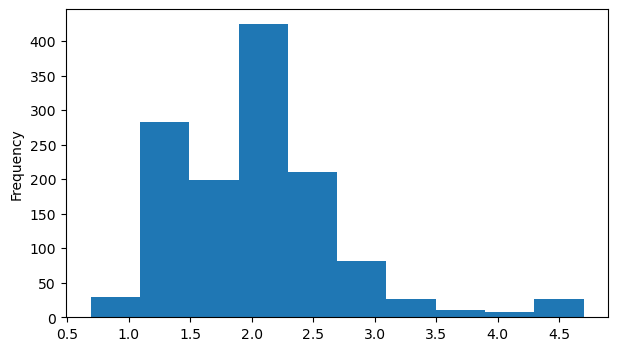

In [126]:
laptops["Weight"].plot.hist();

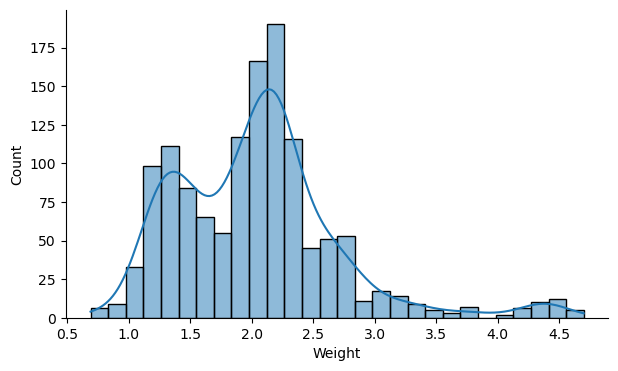

In [127]:
sns.histplot(laptops['Weight'], kde=True)

sns.despine()

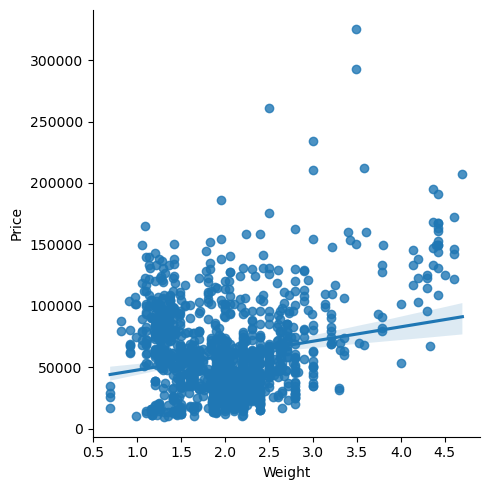

In [128]:
sns.lmplot(x="Weight", y="Price", data=laptops)

sns.despine()

In [129]:
corr_test(laptops, 'Weight', 'Price')

Correlation Test: 

Correlation test is used to find out is there any correlation between two variables or not? 

        * Null Hypothesis(H0): There is NO correlation between two variables
        * Alternative Hypothesis(H1): There is a correlation between two variables 

Here we will try to reject the Null Hypothesis based on correlation score 

Correlation Score: 0.20944398779730194


* `Weight` has moderate correlation with `Price`

In [130]:
## We can drop Incehs column because it is not correlated with price

laptops.drop("Inches", axis=1, inplace=True)

In [131]:
laptops.head()

,Company,TypeName,ScreenResolution,Ram,OpSys,Weight,Price,IPS,Touchscreen,CPU_Brand,SSD,HDD,Flash_Storage,GPU_brand
0,Apple,Ultrabook,other,8,Mac,1.37,71378.6832,Yes,No,Intel Core i5,128GB and less,No HDD,No,Intel
1,Apple,Ultrabook,other,8,Mac,1.34,47895.5232,No,No,Intel Core i5,No SSD,No HDD,Yes,Intel
2,HP,Notebook,1920x1080,8,No OS,1.86,30636.0000,No,No,Intel Core i5,256GB,No HDD,No,Intel
3,Apple,Ultrabook,other,16,Mac,1.83,135195.3360,Yes,No,Intel Core i7,512GB,No HDD,No,AMD
4,Apple,Ultrabook,other,8,Mac,1.37,96095.8080,Yes,No,Intel Core i5,256GB,No HDD,No,Intel


In [132]:
laptops.columns = list(map(str.lower, laptops.columns))

laptops.head()

,company,typename,screenresolution,ram,opsys,weight,price,ips,touchscreen,cpu_brand,ssd,hdd,flash_storage,gpu_brand
0,Apple,Ultrabook,other,8,Mac,1.37,71378.6832,Yes,No,Intel Core i5,128GB and less,No HDD,No,Intel
1,Apple,Ultrabook,other,8,Mac,1.34,47895.5232,No,No,Intel Core i5,No SSD,No HDD,Yes,Intel
2,HP,Notebook,1920x1080,8,No OS,1.86,30636.0000,No,No,Intel Core i5,256GB,No HDD,No,Intel
3,Apple,Ultrabook,other,16,Mac,1.83,135195.3360,Yes,No,Intel Core i7,512GB,No HDD,No,AMD
4,Apple,Ultrabook,other,8,Mac,1.37,96095.8080,Yes,No,Intel Core i5,256GB,No HDD,No,Intel


## Split data

In [133]:
X = laptops.drop(["price","weight"], axis=1)
y = laptops["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

X_train.shape, X_test.shape, y_train.shape

((1040, 12), (260, 12), (1040,))

In [134]:
X_train["opsys"].value_counts()

Windows    894
No OS       54
Linux       48
Other       28
Mac         16
Name: opsys, dtype: int64

In [135]:
## saving data 

X_train.to_csv('X_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
y_test.to_csv('y_test.csv', index=False)

## Data Preprocessing

In [136]:
cat_cols = X_train.select_dtypes(include="O").columns

cat_cols

Index(['company', 'typename', 'screenresolution', 'ram', 'opsys', 'ips',
       'touchscreen', 'cpu_brand', 'ssd', 'hdd', 'flash_storage', 'gpu_brand'],
      dtype='object')

In [137]:
num_cols = X_train.select_dtypes(exclude="O").columns

num_cols

Index([], dtype='object')

In [138]:
num_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

cat_transformer = Pipeline(steps=[
     ("encoder", OneHotEncoder(sparse_output=False, drop='first', handle_unknown="ignore"))])

In [139]:

preprocessor = ColumnTransformer(transformers=[
     ("cat", cat_transformer, cat_cols),
    ('num', num_transformer, num_cols)
])

In [140]:
preprocessor.fit_transform(X_train)

array([[0., 0., 1., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [141]:
preprocessor.fit_transform(X_train).shape

(1040, 45)

## Model Selection and Evaluations

### Linear Regression

In [142]:
model_lr =Pipeline(steps=[
    ("prep", preprocessor),
    ("LR", LinearRegression())
])

In [143]:
model_lr.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['company', 'typename', 'screenresolution', 'ram', 'opsys', 'ips',
       'touchscreen', 'cpu_brand', 'ssd', 'hdd', 'flash_storage', 'gpu_brand'],
      dtype='object')),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index([], dtype='object'))])),
                ('LR', LinearRegression())])

In [144]:
print(f"Training R2_score: {r2_score(y_train, model_lr.predict(X_train))}")
print(f"Test R2_score: {r2_score(y_test, model_lr.predict(X_test))}")
print(f"Training MAE: {mean_absolute_error(y_train, model_lr.predict(X_train))}")
print(f"Training MAE: {mean_absolute_error(y_test, model_lr.predict(X_test))}")

Training R2_score: 0.7716523869387709
Test R2_score: 0.7899768276224448
Training MAE: 12554.901939539215
Training MAE: 11525.714926333856


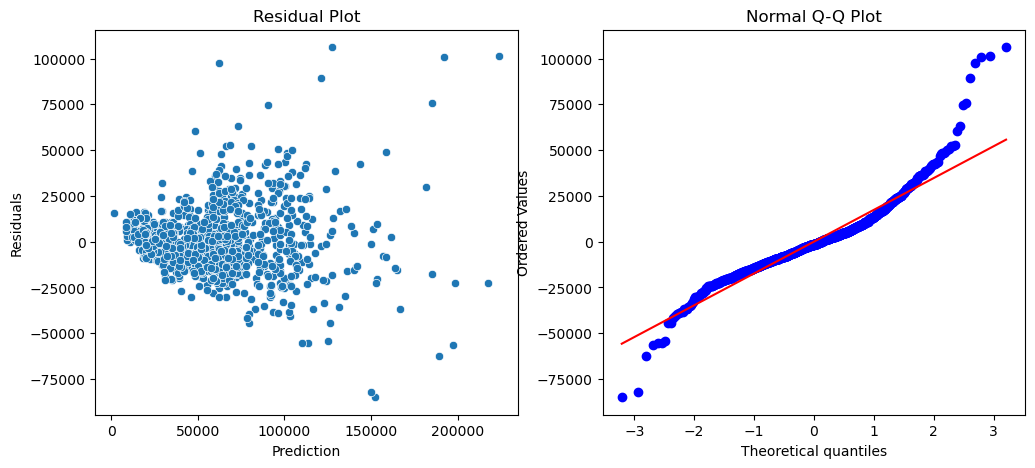

In [145]:
prediction = model_lr.predict(X_train)
residuals = y_train - model_lr.predict(X_train)

fig, ax = plt.subplots(1,2,figsize=(12,5))

sns.scatterplot(x=prediction, y=residuals, ax=ax[0])
ax[0].set_title("Residual Plot")
ax[0].set_xlabel("Prediction")
ax[0].set_ylabel("Residuals")

stats.probplot(residuals, dist="norm", plot=ax[1])
ax[1].set_title("Normal Q-Q Plot") 
plt.show()

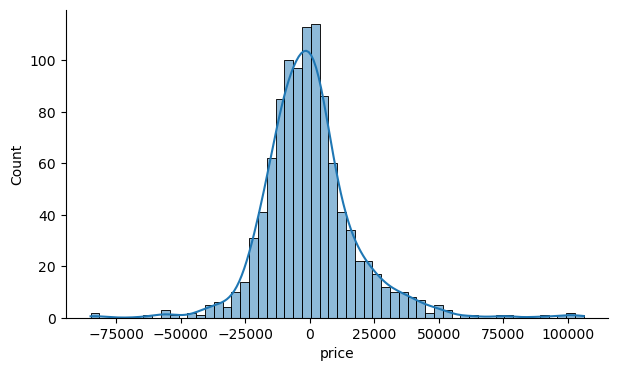

In [146]:
sns.histplot(residuals, kde=True)

sns.despine()

### Ridge Regression

In [147]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeCV

In [148]:
alphas = 10 ** np.linspace(-5, 5, 200)

model_rr = Pipeline(steps=[
    ('pre', preprocessor),
    ('rr', RidgeCV(alphas=alphas, cv=5))
])


In [149]:
model_rr.fit(X_train, y_train)

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['company', 'typename', 'screenresolution', 'ram', 'opsys', 'ips',
       'touchscreen', 'cpu_brand', 'ssd', 'hdd', 'flash_storage', 'gpu_brand'],
      dtype='object')),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   St...
       6.98587975e+03, 7.84282206e+03, 8.80488358e+03, 9.88495905e+03,
       1.10975250e+04, 1.24588336e+04, 1.39871310e+04, 1.57029012e+04,
       1.76291412e+04, 1.97916687e+04, 2.22194686e+04, 2.49450814e+04,
       2.80050389e+04, 3.14403547e+04, 3.52970730e+04, 3.96268864e+04,
       4.44878283e+04, 4.99450512e+04, 5.60716994e+04, 6.29498899e+04,
       7.06718127e+04, 7.93409667e+04, 8.90735464e+04, 1.00000000e+05]),
                         cv=5))])

In [150]:
print(f"Training R2_score: {r2_score(y_train, model_rr.predict(X_train))}")
print(f"Test R2_score: {r2_score(y_test, model_rr.predict(X_test))}")
print(f"Training MAE: {mean_absolute_error(y_train, model_rr.predict(X_train))}")
print(f"Training MAE: {mean_absolute_error(y_test, model_rr.predict(X_test))}")

Training R2_score: 0.7711614845113434
Test R2_score: 0.7928799497736301
Training MAE: 12514.694140290003
Training MAE: 11481.273022460604


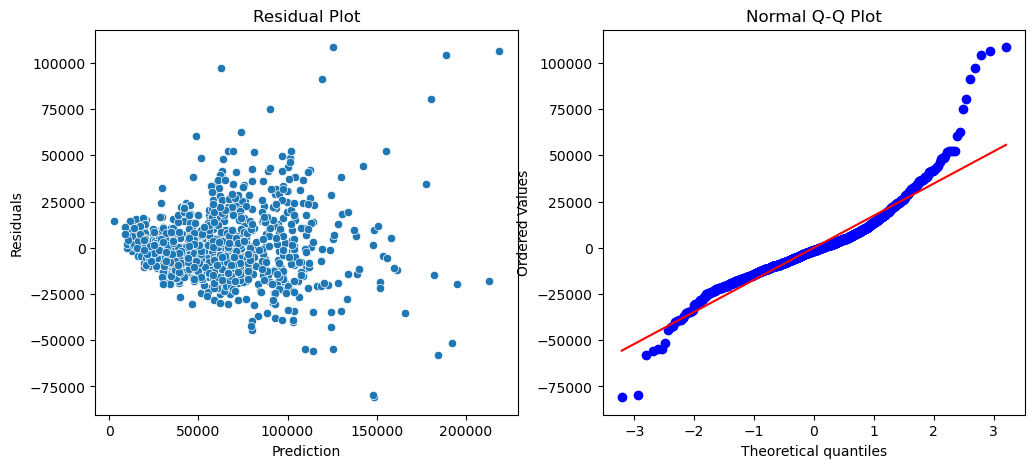

In [151]:
prediction = model_rr.predict(X_train)
residuals = y_train - model_rr.predict(X_train)

fig, ax = plt.subplots(1,2,figsize=(12,5))

sns.scatterplot(x=prediction, y=residuals, ax=ax[0])
ax[0].set_title("Residual Plot")
ax[0].set_xlabel("Prediction")
ax[0].set_ylabel("Residuals")

stats.probplot(residuals, dist="norm", plot=ax[1])
ax[1].set_title("Normal Q-Q Plot") 
plt.show()

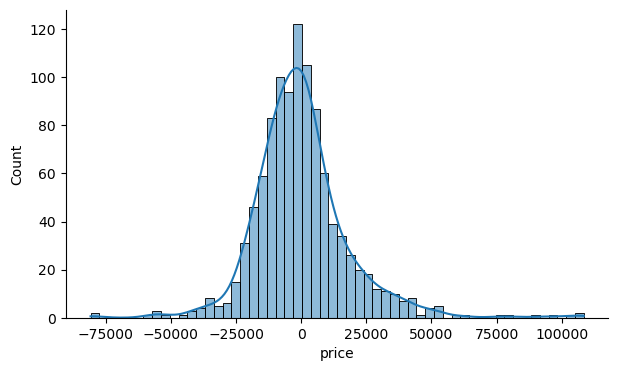

In [152]:
sns.histplot(residuals, kde=True)

sns.despine()

### Decision Tree

In [153]:
model_dt = Pipeline(steps=[
    ('pre', preprocessor),
    ('dt', DecisionTreeRegressor(max_depth=7))
])

In [154]:
model_dt.fit(X_train, y_train)

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['company', 'typename', 'screenresolution', 'ram', 'opsys', 'ips',
       'touchscreen', 'cpu_brand', 'ssd', 'hdd', 'flash_storage', 'gpu_brand'],
      dtype='object')),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index([], dtype='object'))])),
                ('dt', DecisionTreeRegressor(max_depth=7))])

In [155]:
print(f"Training R2_score: {r2_score(y_train, model_dt.predict(X_train))}")
print(f"Test R2_score: {r2_score(y_test, model_dt.predict(X_test))}")
print(f"Training MAE: {mean_absolute_error(y_train, model_dt.predict(X_train))}")
print(f"Training MAE: {mean_absolute_error(y_test, model_dt.predict(X_test))}")

Training R2_score: 0.8309715518887972
Test R2_score: 0.7199470752064742
Training MAE: 10878.34212538979
Training MAE: 12721.67133556204


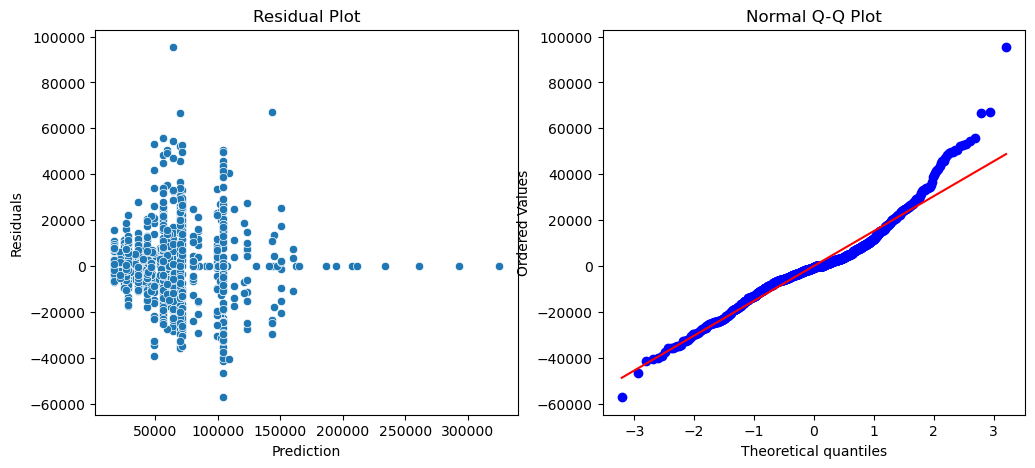

In [156]:
prediction = model_dt.predict(X_train)
residuals = y_train - model_dt.predict(X_train)

fig, ax = plt.subplots(1,2,figsize=(12,5))

sns.scatterplot(x=prediction, y=residuals, ax=ax[0])
ax[0].set_title("Residual Plot")
ax[0].set_xlabel("Prediction")
ax[0].set_ylabel("Residuals")

stats.probplot(residuals, dist="norm", plot=ax[1])
ax[1].set_title("Normal Q-Q Plot") 
plt.show()

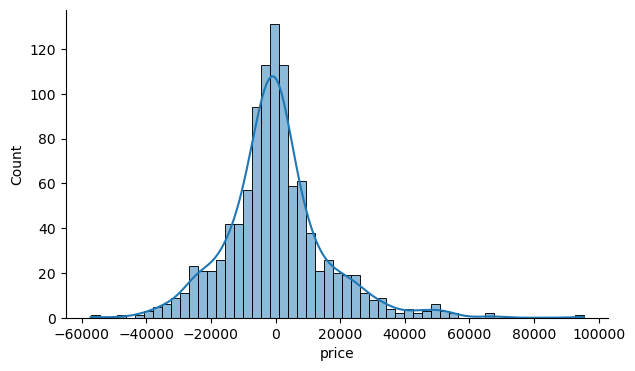

In [157]:
sns.histplot(residuals, kde=True)

sns.despine()

### Random Forest

In [158]:
model_rf = Pipeline(steps=[
    ('pre', preprocessor),
    ('rf', RandomForestRegressor(n_estimators=300, max_depth=7, random_state=100))
])

In [159]:
model_rf.fit(X_train, y_train)

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['company', 'typename', 'screenresolution', 'ram', 'opsys', 'ips',
       'touchscreen', 'cpu_brand', 'ssd', 'hdd', 'flash_storage', 'gpu_brand'],
      dtype='object')),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index([], dtype='object'))])),
                ('rf',
                 RandomForestRegressor(max_depth=7, n_estimators=300,
                                       random_state=100))])

In [160]:
print(f"Training R2_score: {r2_score(y_train, model_rf.predict(X_train))}")
print(f"Test R2_score: {r2_score(y_test, model_rf.predict(X_test))}")
print(f"Training MAE: {mean_absolute_error(y_train, model_rf.predict(X_train))}")
print(f"Test MAE: {mean_absolute_error(y_test, model_rf.predict(X_test))}")

Training R2_score: 0.8472684094758837
Test R2_score: 0.8032498774905991
Training MAE: 10507.935798231805
Test MAE: 11134.207893253888


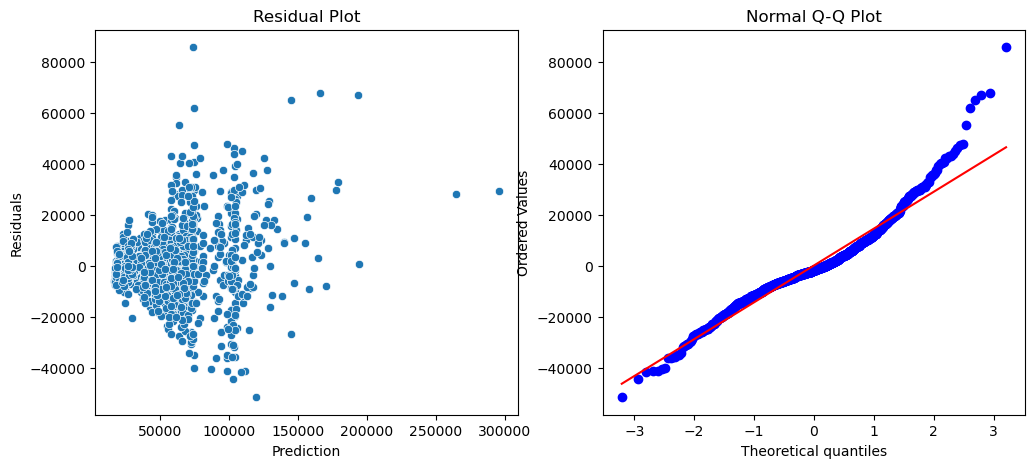

In [161]:
prediction = model_rf.predict(X_train)
residuals = y_train - model_rf.predict(X_train)

fig, ax = plt.subplots(1,2,figsize=(12,5))

sns.scatterplot(x=prediction, y=residuals, ax=ax[0])
ax[0].set_title("Residual Plot")
ax[0].set_xlabel("Prediction")
ax[0].set_ylabel("Residuals")

stats.probplot(residuals, dist="norm", plot=ax[1])
ax[1].set_title("Normal Q-Q Plot") 
plt.show()

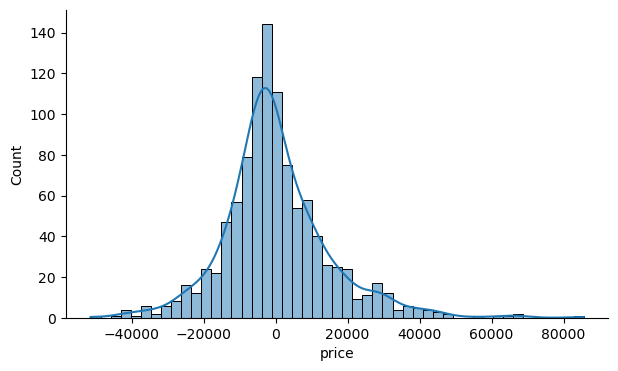

In [162]:
sns.histplot(residuals, kde=True)

sns.despine()

### KNN

In [163]:
from sklearn.neighbors import KNeighborsRegressor

In [164]:
model_knn = Pipeline(steps=[
    ('pre', preprocessor),
    ('knn', KNeighborsRegressor(n_neighbors=5))
])

In [165]:
model_knn.fit(X_train, y_train)

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['company', 'typename', 'screenresolution', 'ram', 'opsys', 'ips',
       'touchscreen', 'cpu_brand', 'ssd', 'hdd', 'flash_storage', 'gpu_brand'],
      dtype='object')),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index([], dtype='object'))])),
                ('knn', KNeighborsRegressor())])

In [166]:
print(f"Training R2_score: {r2_score(y_train, model_knn.predict(X_train))}")
print(f"Test R2_score: {r2_score(y_test, model_knn.predict(X_test))}")
print(f"Training MAE: {mean_absolute_error(y_train, model_knn.predict(X_train))}")
print(f"Training MAE: {mean_absolute_error(y_test, model_knn.predict(X_test))}")

Training R2_score: 0.8187093649997471
Test R2_score: 0.7850116439679337
Training MAE: 10248.513535384614
Training MAE: 11154.919657846154


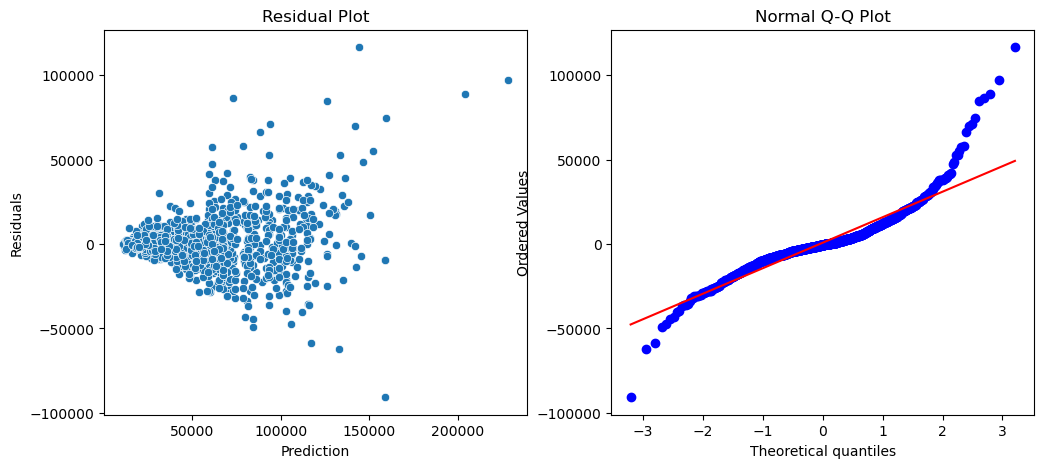

In [167]:
prediction = model_knn.predict(X_train)
residuals = y_train - model_knn.predict(X_train)

fig, ax = plt.subplots(1,2,figsize=(12,5))

sns.scatterplot(x=prediction, y=residuals, ax=ax[0])
ax[0].set_title("Residual Plot")
ax[0].set_xlabel("Prediction")
ax[0].set_ylabel("Residuals")

stats.probplot(residuals, dist="norm", plot=ax[1])
ax[1].set_title("Normal Q-Q Plot") 
plt.show()

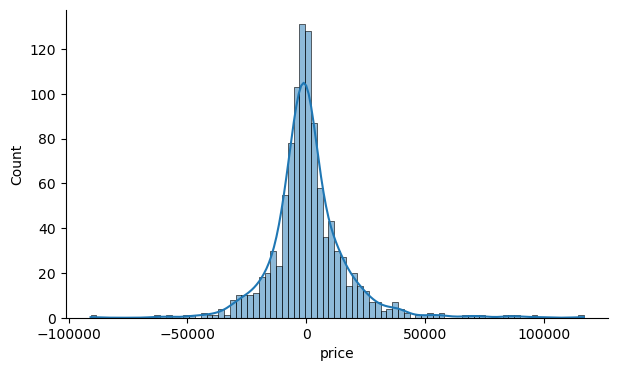

In [168]:
sns.histplot(residuals, kde=True)

sns.despine()

### Adaboost

In [169]:
# Adaboost (Boosting of multiple Decision Trees)
from sklearn.ensemble import AdaBoostRegressor

In [170]:
DTR=DecisionTreeRegressor(max_depth=7)

model_ab = Pipeline(steps=[
    ('pre', preprocessor),
    ('ab', AdaBoostRegressor(n_estimators=200, estimator=DTR ,learning_rate=0.01))
])

In [171]:
model_ab.fit(X_train, y_train)

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['company', 'typename', 'screenresolution', 'ram', 'opsys', 'ips',
       'touchscreen', 'cpu_brand', 'ssd', 'hdd', 'flash_storage', 'gpu_brand'],
      dtype='object')),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index([], dtype='object'))])),
                ('ab',
                 AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=7),
                                   learning_rate=0.01, n_estimators=200))])

In [172]:
print(f"Training R2_score: {r2_score(y_train, model_ab.predict(X_train))}")
print(f"Test R2_score: {r2_score(y_test, model_ab.predict(X_test))}")
print(f"Training MAE: {mean_absolute_error(y_train, model_ab.predict(X_train))}")
print(f"Training MAE: {mean_absolute_error(y_test, model_ab.predict(X_test))}")

Training R2_score: 0.8546436796184838
Test R2_score: 0.7961660635678369
Training MAE: 10023.19294162137
Training MAE: 11104.952535189936


### Random Forest model is giving the best output compare to all other, therefore, we will finaliz this model for deployement

## Model Persistence

In [173]:
# joblib.dump(model_rf, "final_model.joblib")

['final_model.joblib']

In [174]:
# saved_model = joblib.load("final_model.joblib")
# saved_model

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['company', 'typename', 'screenresolution', 'ram', 'opsys', 'ips',
       'touchscreen', 'cpu_brand', 'ssd', 'hdd', 'flash_storage', 'gpu_brand'],
      dtype='object')),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index([], dtype='object'))])),
                ('rf',
                 RandomForestRegressor(max_depth=7, n_estimators=300,
                                       random_state=100))])

In [175]:
# print(f"Training R2_score: {r2_score(y_train, saved_model.predict(X_train))}")
# print(f"Test R2_score: {r2_score(y_test, saved_model.predict(X_test))}")

Training R2_score: 0.8472684094758837
Test R2_score: 0.8032498774905991


In [176]:
import pickle

# Assume `model` is your trained machine learning model
with open("final_model.pkl", "wb") as file:
    pickle.dump(model_rf, file)

In [177]:
with open("final_model.pkl", "rb") as file:
    loaded_model = pickle.load(file)

In [178]:
loaded_model.predict(X_test)

array([ 44037.78659848,  40742.38931411,  18417.32784642, 113006.27593841,
        37865.03639411, 137801.83298927,  24817.30549547,  18544.88199791,
        29850.46810519,  72866.87164273,  18461.12219207,  26783.61753255,
        48060.81327844,  18233.22191711,  26476.61258581,  68834.94708669,
        79844.56522071,  99555.40572737,  54149.24032322,  20730.61442107,
        27175.51019008, 115945.48186908,  18373.83318351,  39320.92892268,
        72780.02406898,  44037.78659848,  48046.21045945,  29771.6320089 ,
        38933.69524482,  58386.31626731,  18252.66008164,  61977.66346751,
        56703.42343193,  68711.07421361, 101448.42991237,  65106.32164248,
        39528.26469599,  69107.45939181,  68691.01048912,  31451.63766537,
        27283.11062845,  41932.28239925,  66702.84406929, 110114.04860589,
        61603.172307  ,  67627.55421141,  99855.68640625,  60433.10096659,
        52802.09988709,  27271.01005915,  44876.57419272, 103856.12083538,
        69517.13403503,  

In [179]:
print(f"Training R2_score: {r2_score(y_train, loaded_model.predict(X_train))}")
print(f"Test R2_score: {r2_score(y_test, loaded_model.predict(X_test))}")

Training R2_score: 0.8472684094758837
Test R2_score: 0.8032498774905991
